## 한글 설정

In [10]:
# 실행 전 미리 폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 런타임 다시 시작

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [1]:
import matplotlib.pyplot as plt
# 폰트 설정
plt.rc('font' , family='NanumBarunGothic')

## 워드 클라우드 설정

In [2]:
# 워드클라우드 관련 라이브러리 설치
!pip install konlpy
!pip install wordcloud

!pip install pytagcloud
!pip install pygame
!pip install simplejson

In [18]:
# 한국어 형태소 분석
from konlpy.tag import Okt, Hannanum, Kkma, Mecab, Komoran

# 워드 클라우드
from wordcloud import WordCloud
import pytagcloud
from collections import Counter
from IPython.display import Image

## 데이터 수집


**네이버 증권에 나와있는 주요 뉴스내용을 워드 클라우드로 표현해보자**<br>
**기준일자 : 24년 03월 28일**

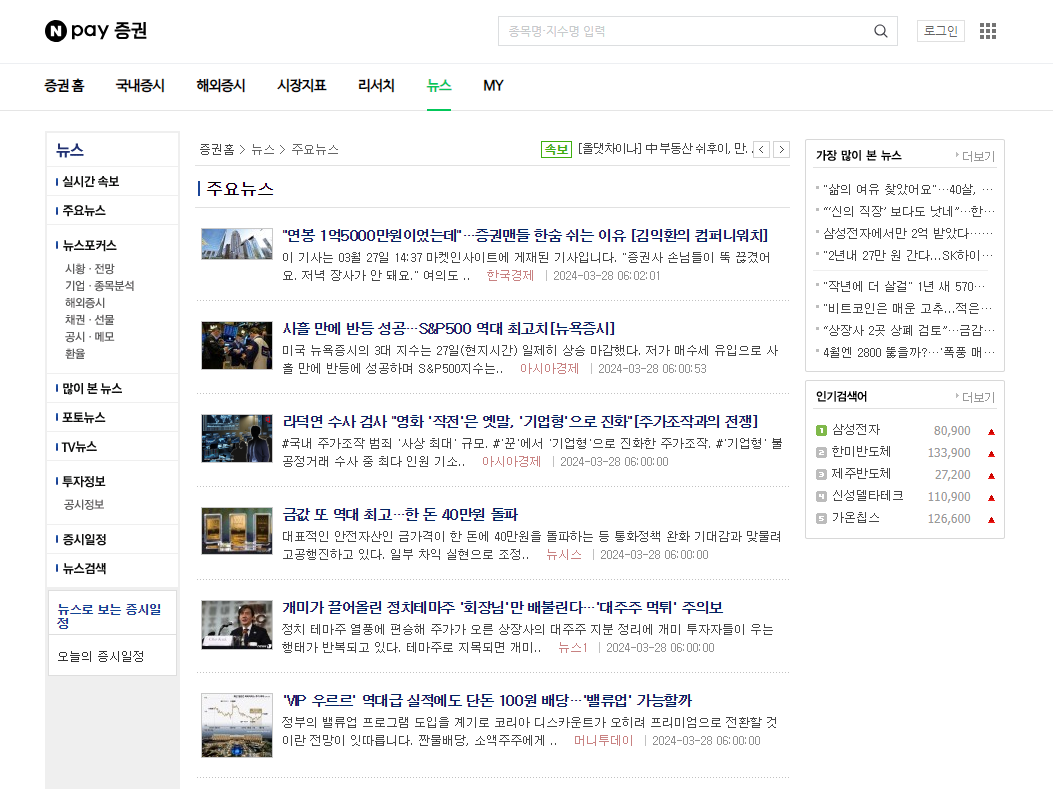

**첫번째 페이지 수집 코드**


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def get_news_info(url):
    # HTTP GET 요청을 보내서 웹 페이지 가져오기
    response = requests.get(url)

    # 응답 받은 데이터를 파싱하기
    soup = BeautifulSoup(response.text, 'html.parser')

    # 뉴스 제목과 내용 가져오기
    news_info = []
    for title, content in zip(soup.find_all(class_='articleSubject'), soup.find_all(class_='articleSummary')):
        news_info.append([title.get_text().strip(), content.get_text().strip()])

    return news_info

# 뉴스 제목과 내용을 가져올 웹 사이트 URL
url = "https://finance.naver.com/news/mainnews.naver"

# 뉴스 정보 가져오기
news_info = get_news_info(url)

# 가져온 뉴스 정보를 DataFrame으로 변환하기
df = pd.DataFrame(news_info, columns=['뉴스 제목', '뉴스 내용'])
df

,뉴스 제목,뉴스 내용
0,"리서치알음 ""디지털대성, 의대정원 증원 확대 수혜주...목표가 40%↑""",리서치알음은 28일 디지털대성에 대해 의대 정원 2000명 증원으로 인한 대입 교육...
1,"""2년내 27만 원 간다...SK하이닉스 상승구간 진입""[오전장 백브리핑]","다음 이슈로 넘어가겠습니다. 김 기자, 최근 들어 삼성전자와 SK하이닉스의 주가 상..."
2,"밸류업 D+30…'코스피 3,000' 함께 할 친구 [오전장 백브리핑]",백브리핑 시작하겠습니다. 오늘은 증권부 김동하 기자와 함께합니다. 최근 코스피가 연...
3,"“이마트, 온·오프라인 가운데서 갈팡질팡하다 적자 내” 증권가의 뼈아픈 지적",이마트가 확고한 경영 전략을 세우지 못하는 바람에 사상 첫 적자를 냈다는 증권가의 ...
4,"국내 ETF 전문가들 ""AI·바이오·우주 주목…불확실성 대비""",국내 주요 운용사 상장지수펀드(ETF) 전문가들이 2024년 유망 테마로 '인공지능...
5,HBM 기대감에 한미반도체 15% 급등…부품·장비주 `들썩`,뉴욕증시가 미국 경제 연착륙 전망에 일제히 상승 마감하면서 국내 반도체주가 덩달아 ...
6,최근 1년간 474% 오른 ‘이 주식’…마이크론과 장비 계약 추진에 9% 급등 [투...,한미반도체가 마이크론과 신규 계약을 추진 중이라는 소식에 28일 장 초반 급등하고 ...
7,"폭주하던 2차전지株 엔켐, 한 달간 30% 추락... 메리츠는 500억 차익 남겨",개인 매수가 끌어올린 주가… 기관은 4100억원 순매도 2022년 유증 관련 우선주...
8,1분기 ETF 수익률 승자는…‘AI반도체·바이오·은행’ [투자360],올 1분기 ETF(상장지수펀드) 투자의 승자는 ‘반도체·바이오·은행’으로 요약된다....
9,"‘부실금융기관 항소’ MG손보, 인수금융 만기 연장될까",MG손해보험 매각 작업이 진행 중인 가운데 기존 최대주주 JC파트너스가 인수자금 마...


**전체 페이지 수집 코드**

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def get_news_info(page_num):
    # 뉴스 정보를 저장할 리스트 초기화
    news_info = []

    # 페이지 번호에 따른 URL 만들기
    url = f"https://finance.naver.com/news/mainnews.naver?&page={page_num}"

    # HTTP GET 요청을 보내서 웹 페이지 가져오기
    response = requests.get(url)

    # 응답 받은 데이터를 파싱하기
    soup = BeautifulSoup(response.text, 'html.parser')

    # 뉴스 제목과 내용 가져오기
    for title, content in zip(soup.find_all(class_='articleSubject'), soup.find_all(class_='articleSummary')):
        news_info.append([title.get_text().strip(), content.get_text().strip()])

    return news_info

# 전체 페이지의 뉴스 정보를 가져오기
total_news_info = []
for page_num in range(1, 6):  # 1부터 5까지의 페이지를 가져오겠습니다. 적절히 변경 가능
    total_news_info.extend(get_news_info(page_num))

# 가져온 뉴스 정보를 DataFrame으로 변환하기
df = pd.DataFrame(total_news_info, columns=['뉴스 제목', '뉴스 내용'])
df

,뉴스 제목,뉴스 내용
0,"리서치알음 ""디지털대성, 의대정원 증원 확대 수혜주...목표가 40%↑""",리서치알음은 28일 디지털대성에 대해 의대 정원 2000명 증원으로 인한 대입 교육...
1,"""2년내 27만 원 간다...SK하이닉스 상승구간 진입""[오전장 백브리핑]","다음 이슈로 넘어가겠습니다. 김 기자, 최근 들어 삼성전자와 SK하이닉스의 주가 상..."
2,"밸류업 D+30…'코스피 3,000' 함께 할 친구 [오전장 백브리핑]",백브리핑 시작하겠습니다. 오늘은 증권부 김동하 기자와 함께합니다. 최근 코스피가 연...
3,"“이마트, 온·오프라인 가운데서 갈팡질팡하다 적자 내” 증권가의 뼈아픈 지적",이마트가 확고한 경영 전략을 세우지 못하는 바람에 사상 첫 적자를 냈다는 증권가의 ...
4,"국내 ETF 전문가들 ""AI·바이오·우주 주목…불확실성 대비""",국내 주요 운용사 상장지수펀드(ETF) 전문가들이 2024년 유망 테마로 '인공지능...
...,...,...
77,“더 오르겠어?”…코스피 하락 베팅하는 개미,코스피가 밸류업 프로그램과 반도체 업황 반등에 힘입어 2750선을 돌파했지만 개인 ...
78,韓 증시 뜨거운데 '네카오'만 비실비실…개미들 ‘울상’,"국내 증시가 올해 초 ‘밸류업 프로그램’으로 군불을 때고, 인공지능(AI) 붐으로 ..."
79,"30년 국채선물 한 달, 거래량 저조… “추가 조치는 아직”",지난달 19일 상장된 30년 국채선물의 계약 수가 여전히 100계약 대를 보이는 가...
80,"'쾌속질주' SK하이닉스, 증권가 핑크빛 전망… ""AI 훈풍 탔다""",SK하이닉스가 연일 신고가 행진을 이어가고 있다. 글로벌 인공지능(AI) 투자 붐에...


In [9]:
# 결측치 확인
df.isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   뉴스 제목   82 non-null     object
 1   뉴스 내용   82 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


## 한글 정제
---
한글 정제를 통해 불필요한 단어들 정리됨.

In [11]:
import re

# 주어진 문장에서 한글만 추출해 반환하는 함수
def text_cleaning(text) :

    # 한글 정규식(띄어쓰기, ㄱ ~ ㅣ, 가 ~ 힣)
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')

    # 정규식에 위배되는 글자들은 길이가 0인 문자열로 변환한다.
    result = hangul.sub('', text)
    return result

# 한글 정제
df['뉴스 제목'] = df['뉴스 제목'].apply(lambda x : text_cleaning(x))
df['뉴스 내용'] = df['뉴스 내용'].apply(lambda x : text_cleaning(x))

df

,뉴스 제목,뉴스 내용
0,리서치알음 디지털대성 의대정원 증원 확대 수혜주목표가,리서치알음은 일 디지털대성에 대해 의대 정원 명 증원으로 인한 대입 교육섹터에 전반...
1,년내 만 원 간다하이닉스 상승구간 진입오전장 백브리핑,다음 이슈로 넘어가겠습니다 김 기자 최근 들어 삼성전자와 하이닉스의 주가 상승이 심...
2,밸류업 코스피 함께 할 친구 오전장 백브리핑,백브리핑 시작하겠습니다 오늘은 증권부 김동하 기자와 함께합니다 최근 코스피가 연중 ...
3,이마트 온오프라인 가운데서 갈팡질팡하다 적자 내 증권가의 뼈아픈 지적,이마트가 확고한 경영 전략을 세우지 못하는 바람에 사상 첫 적자를 냈다는 증권가의 ...
4,국내 전문가들 바이오우주 주목불확실성 대비,국내 주요 운용사 상장지수펀드 전문가들이 년 유망 테마로 인공지능 테마를 꼽았다 바...
...,...,...
77,더 오르겠어코스피 하락 베팅하는 개미,코스피가 밸류업 프로그램과 반도체 업황 반등에 힘입어 선을 돌파했지만 개인 투자자는...
78,증시 뜨거운데 네카오만 비실비실개미들 울상,국내 증시가 올해 초 밸류업 프로그램으로 군불을 때고 인공지능 붐으로 반도체가 바통...
79,년 국채선물 한 달 거래량 저조 추가 조치는 아직,지난달 일 상장된 년 국채선물의 계약 수가 여전히 계약 대를 보이는 가운데 정부 차...
80,쾌속질주 하이닉스 증권가 핑크빛 전망 훈풍 탔다,하이닉스가 연일 신고가 행진을 이어가고 있다 글로벌 인공지능 투자 붐에 반도체 업황...


## 챗GPT에게 한글로 워드클라우드 만드는 방법 알아봄.

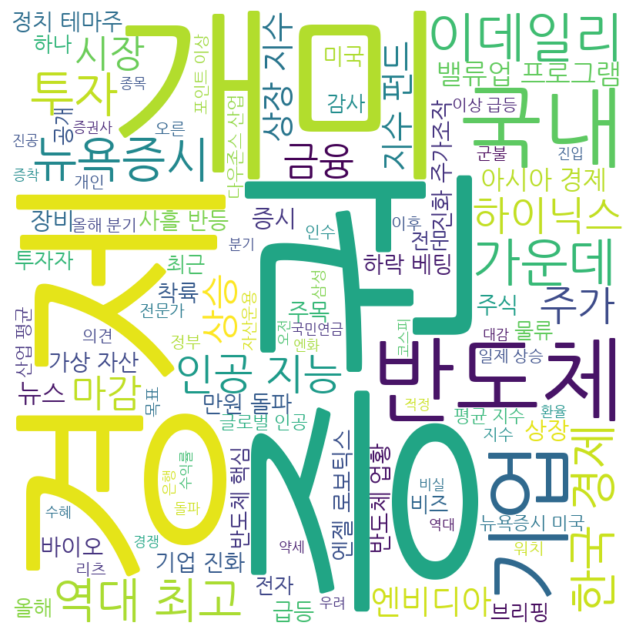

In [19]:
# 데이터프레임 불러오기 (이전 코드의 결과)
# df = pd.DataFrame(total_news_info, columns=['뉴스 제목', '뉴스 내용'])

# 형태소 분석기 생성
okt = Okt()

# 제목과 내용을 합쳐서 분석에 활용
text_combined = ' '.join(df['뉴스 제목']) + ' '.join(df['뉴스 내용'])

# 형태소 분석 및 명사 추출
nouns = okt.nouns(text_combined)

# 한 글자 이상의 명사만 추출
nouns = [word for word in nouns if len(word) > 1]

# 추출된 명사 리스트를 공백으로 연결하여 텍스트로 변환
text = ' '.join(nouns)

# 워드 클라우드 생성
wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
                      background_color='white',
                      width=800, height=800,
                      max_words=100,
                      colormap='viridis').generate(text)

# 워드 클라우드 출력
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

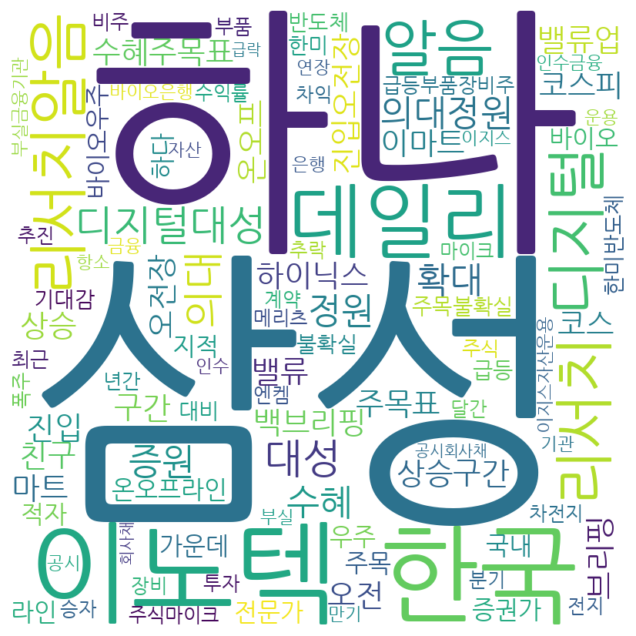

In [20]:
# 형태소 분석기 생성
Kkma = Kkma()

# 제목과 내용을 합쳐서 분석에 활용
text_combined = ' '.join(df['뉴스 제목']) + ' '.join(df['뉴스 내용'])

# 형태소 분석 및 명사 추출
nouns = Kkma.nouns(text_combined)

# 한 글자 이상의 명사만 추출
nouns = [word for word in nouns if len(word) > 1]

# 추출된 명사 리스트를 공백으로 연결하여 텍스트로 변환
text = ' '.join(nouns)

# 워드 클라우드 생성
wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
                      background_color='white',
                      width=800, height=800,
                      max_words=100,
                      colormap='viridis').generate(text)

# 워드 클라우드 출력
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()